Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

First 5 rows of data:
    loan_id  no_of_dependents      education self_employed  income_annum  \
0        1                 2       Graduate            No       9600000   
1        2                 0   Not Graduate           Yes       4100000   
2        3                 3       Graduate            No       9100000   
3        4                 3       Graduate            No       8200000   
4        5                 5   Not Graduate           Yes       9800000   

   loan_amount  loan_term  cibil_score  residential_assets_value  \
0     29900000         12          778                   2400000   
1     12200000          8          417                   2700000   
2     29700000         20          506                   7100000   
3     30700000          8          467                  18200000   
4     24200000         20          382                  

/tmp/ipython-input-1807118737.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='loan_status', data=df, palette='Set2')


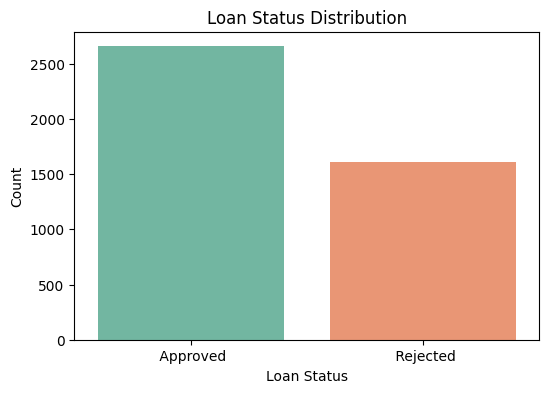

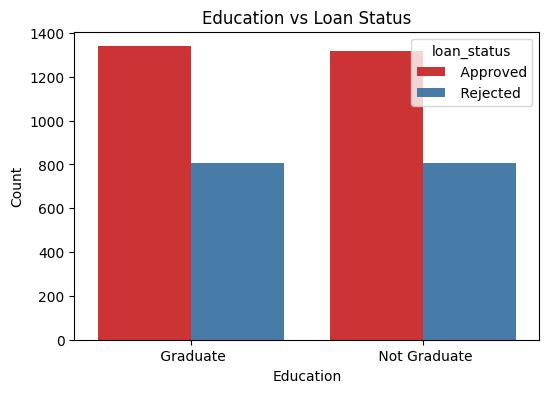


--- Logistic Regression ---
              precision    recall  f1-score   support

           0       0.74      0.87      0.80       502
           1       0.86      0.73      0.79       561

    accuracy                           0.80      1063
   macro avg       0.80      0.80      0.80      1063
weighted avg       0.81      0.80      0.80      1063



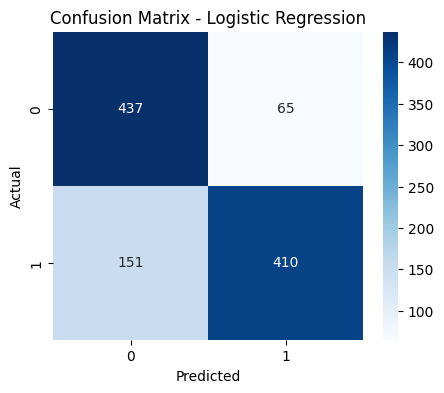


--- Decision Tree ---
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       502
           1       0.99      0.97      0.98       561

    accuracy                           0.98      1063
   macro avg       0.98      0.98      0.98      1063
weighted avg       0.98      0.98      0.98      1063



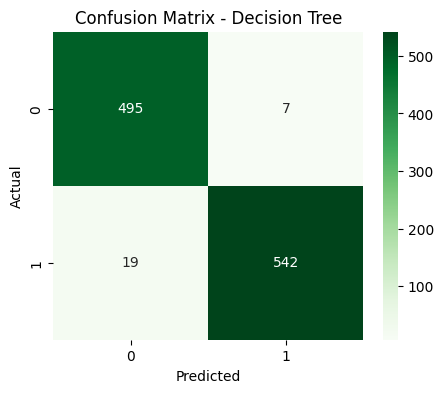


=== Sample Predictions (First 10 Test Records) ===
Actual   : [0, 0, 0, 0, 1, 0, 1, 1, 0, 1]
Logistic : [0, 1, 0, 0, 0, 0, 1, 1, 1, 0]
Decision : [0, 0, 0, 0, 1, 0, 1, 1, 0, 1]


In [7]:

# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from google.colab import drive


# Load Dataset from Google Drive

drive.mount('/content/drive')
data_path = '/content/drive/MyDrive/loan_approval_dataset.csv'
df = pd.read_csv(data_path)

# ✅ Clean column names (remove extra spaces if any)
df.columns = df.columns.str.strip()


# Dataset Overview

print("\nFirst 5 rows of data:\n", df.head())
print("\nDataset Info:\n")
print(df.info())
print("\nMissing Values:\n", df.isnull().sum())


# Handle Missing Values

for col in df.select_dtypes(include=['float64', 'int64']).columns:
    df[col] = df[col].fillna(df[col].median())

for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].fillna(df[col].mode()[0])


# Exploratory Data Analysis

plt.figure(figsize=(6, 4))
sns.countplot(x='loan_status', data=df, palette='Set2')
plt.title('Loan Status Distribution')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(6, 4))
sns.countplot(x='education', hue='loan_status', data=df, palette='Set1')
plt.title('Education vs Loan Status')
plt.xlabel('Education')
plt.ylabel('Count')
plt.show()


# Encode Categorical Columns

label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


# Features and Target

X = df.drop('loan_status', axis=1)
y = df['loan_status']

# Handle Class Imbalance using SMOTE

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)


# Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.2, random_state=42
)


# Logistic Regression

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

print("\n--- Logistic Regression ---")
print(classification_report(y_test, y_pred_log))

# Confusion Matrix for Logistic Regression
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# Decision Tree

tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

print("\n--- Decision Tree ---")
print(classification_report(y_test, y_pred_tree))

# Confusion Matrix for Decision Tree
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_tree), annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Show Sample Predictions

sample_data = X_test[:10]  # take first 10 rows
log_preds = log_model.predict(sample_data)
tree_preds = tree_model.predict(sample_data)

# ✅ Convert to clean Python ints
actual_vals = [int(i) for i in y_test[:10]]
log_vals = [int(i) for i in log_preds]
tree_vals = [int(i) for i in tree_preds]

print("\n=== Sample Predictions (First 10 Test Records) ===")
print("Actual   :", actual_vals)
print("Logistic :", log_vals)
print("Decision :", tree_vals)
